# Import library

In [4]:
import os 
import json
from langdetect import detect
import re
import pycld2 as cld2
import sys
import string
from collections import Counter
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import emoji
import matplotlib.pyplot as mpl
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from pprint import pprint
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import numpy as np

# Youtube Blackpink

In [5]:
youtube_bp = 'youtube_data_bp_compiled.json' 

with open('youtube_data_bp_compiled.json', 'r', encoding='utf-8') as json_file:
    youtube_data_bp = json.load(json_file)

In [6]:
youtube_data_bp

{'UCgu_CgikmyhrYBmQzH535eg': {'commenter_id': 'UCgu_CgikmyhrYBmQzH535eg',
  'commenter_name': 'СУПЕР ГУСЬ',
  'comment_text': 'jisoo?..',
  'comment_timestamp': '2023-10-10T06:41:57Z',
  'comment_likes': 0,
  'video_id': 'VlUv1lED0rE',
  'video_title': 'BLACKPINK WORLD TOUR [BORN PINK] OSAKA HIGHLIGHT CLIP',
  'video_timestamp': '2023-06-08T12:00:21Z',
  'video_views': '1258360',
  'video_likes': '181722',
  'replies': {}},
 'UCAUiU-DuAj1BpQ_jpXpPvJg': {'commenter_id': 'UCAUiU-DuAj1BpQ_jpXpPvJg',
  'commenter_name': 'Ready for love',
  'comment_text': '❤❤❤ 2:03',
  'comment_timestamp': '2023-10-10T06:40:40Z',
  'comment_likes': 0,
  'video_id': 'eQNHDV7lKgE',
  'video_title': 'JENNIE - ‘You & Me’ DANCE PERFORMANCE VIDEO',
  'video_timestamp': '2023-10-06T04:00:20Z',
  'video_views': '21244288',
  'video_likes': '2184932',
  'replies': {}},
 'UCaMIIV47FtbseiVaAtYEdBQ': {'commenter_id': 'UCaMIIV47FtbseiVaAtYEdBQ',
  'commenter_name': 'Black',
  'comment_text': '🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄

In [7]:

# Define Unicode ranges for emojis
emoji_ranges = [
    (0x1F600, 0x1F64F),  
    (0x1F300, 0x1F5FF),  
    (0x1F680, 0x1F6FF),  
    (0x1F700, 0x1F77F),  
    (0x1F780, 0x1F7FF),  
    (0x1F800, 0x1F8FF),  
    (0x1F900, 0x1F9FF),  
    (0x1FA00, 0x1FA6F),  
    (0x1FA70, 0x1FAFF),  
    (0x1F004, 0x1F0CF),  
]



# Create a regex pattern to match emojis in the specified Unicode ranges
emoji_pattern = '|'.join(f'[{chr(start)}-{chr(end)}]' for start, end in emoji_ranges)

def clean_text(text):
    # Convert "rosé" to "rose"
    text = text.replace("rosé", "rose")
    text = text.replace("Rosé", "rose")
    
    text = re.sub(emoji_pattern, '', text)
    
    return text

def clean_comments(comments):
    cleaned_comments = []
    for comment_id, comment in comments.items():
        cleaned_comment = {
            "commenter_id": comment.get("commenter_id", ""),
            "commenter_name": clean_text(comment.get("commenter_name", "")),
            "comment_text": clean_text(comment.get("comment_text", "")),
            "comment_timestamp": comment.get("comment_timestamp", ""),
            "comment_likes": comment.get("comment_likes", 0),
            "video_id": comment.get("video_id", ""),
            "video_title": clean_text(comment.get("video_title", "")),
            "video_timestamp": comment.get("video_timestamp", ""),
            "video_views": comment.get("video_views", ""),
            "video_likes": comment.get("video_likes", ""),
            "replies": clean_comments(comment.get("replies", {}))  
        }
        cleaned_comments.append(cleaned_comment)
    return cleaned_comments

# Clean the comments in the YouTube data
youtube_data_bp = clean_comments(youtube_data_bp)


In [8]:
def remove_emojis(text):
    # Define a regex pattern to remove most emojis except the ones you want to keep
    emoji_pattern = r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U0001FB00-\U0001FBFF\U0001FC00-\U0001FCFF\U0001FD00-\U0001FDFF\U0001FE00-\U0001FEFF\U0001FF00-\U0001FFFF\U00002764\U00002728\U00002601\U0001F195\U00012620\U0001F61D]+'
    
    # Remove all emojis except the ones to keep
    text_no_emojis = re.sub(emoji_pattern, '', text)
    
    return text_no_emojis

In [9]:
youtube_data_bp

[{'commenter_id': 'UCgu_CgikmyhrYBmQzH535eg',
  'commenter_name': 'СУПЕР ГУСЬ',
  'comment_text': 'jisoo?..',
  'comment_timestamp': '2023-10-10T06:41:57Z',
  'comment_likes': 0,
  'video_id': 'VlUv1lED0rE',
  'video_title': 'BLACKPINK WORLD TOUR [BORN PINK] OSAKA HIGHLIGHT CLIP',
  'video_timestamp': '2023-06-08T12:00:21Z',
  'video_views': '1258360',
  'video_likes': '181722',
  'replies': []},
 {'commenter_id': 'UCAUiU-DuAj1BpQ_jpXpPvJg',
  'commenter_name': 'Ready for love',
  'comment_text': '❤❤❤ 2:03',
  'comment_timestamp': '2023-10-10T06:40:40Z',
  'comment_likes': 0,
  'video_id': 'eQNHDV7lKgE',
  'video_title': 'JENNIE - ‘You & Me’ DANCE PERFORMANCE VIDEO',
  'video_timestamp': '2023-10-06T04:00:20Z',
  'video_views': '21244288',
  'video_likes': '2184932',
  'replies': []},
 {'commenter_id': 'UCaMIIV47FtbseiVaAtYEdBQ',
  'commenter_name': 'Black',
  'comment_text': '',
  'comment_timestamp': '2023-10-17T21:21:51Z',
  'comment_likes': 0,
  'video_id': 'dNCWe_6HAM8',
  'video_

In [10]:
import json
import nltk
import string
from collections import Counter

# Download NLTK data (if not already downloaded)
nltk.download('stopwords')
nltk.download('punkt')

# Function to process text
def processText(text, tokenizer, stemmer, stopwords):
    # Tokenize the text using the given tokenizer
    tokens = tokenizer.tokenize(text)
    
    # Filter out stopwords and punctuation, and convert to lowercase
    filtered_tokens = [token.lower() for token in tokens if token.lower() not in stopwords]

    # Apply stemming to the filtered tokens
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    
    return stemmed_tokens

# Number of most frequent terms to display
freqNum = 50

# Tweet tokenizer to use
tweetTokenizer = nltk.tokenize.TweetTokenizer()
# Use the punctuation symbols defined in string.punctuation
punctuations = list(string.punctuation)
# Use stopwords from nltk and a few other terms
stopwords = nltk.corpus.stopwords.words('english') + punctuations + ['via'] + ['’']
# Use the popular Porter stemmer
stemmer = nltk.stem.PorterStemmer()
# Term frequency counter
termFreqCounter = Counter()

# Load data from a JSON file
json_file_path = 'youtube_data_bp_compiled.json'  # Replace with the path to your JSON file

with open(json_file_path, 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)

# Process comments from the loaded data
for item in data.values():
    commentText = item.get('comment_text', '')
    
    # Tokenize, filter stopwords, and convert to lowercase
    tokens = processText(text=commentText, tokenizer=tweetTokenizer, stemmer=stemmer, stopwords=stopwords)
    
    # Update count
    termFreqCounter.update(tokens)

# Print out most common terms
for term, count in termFreqCounter.most_common(freqNum):
    print(term + ': ' + str(count))


[nltk_data] Downloading package stopwords to /Users/lee-jun-
[nltk_data]     won/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/lee-jun-
[nltk_data]     won/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


❤: 3947
love: 1113
jenni: 1006
️: 921
😊: 529
😂: 407
😍: 406
🎉: 399
blackpink: 333
song: 331
💗: 326
like: 271
💖: 262
💩: 260
♥: 250
🖤: 250
💜: 244
😮: 223
lisa: 213
😅: 211
solo: 184
🔥: 182
😝: 182
go: 179
jisoo: 175
😭: 174
blink: 169
💕: 169
de: 156
stream: 153
🥰: 149
💓: 146
😢: 145
...: 144
🐷: 140
la: 140
🌹: 134
💛: 133
best: 133
💘: 132
que: 132
😆: 122
beauti: 122
🤩: 122
💞: 119
much: 119
black: 117
pink: 115
queen: 113
😘: 111


In [11]:
import re
import nltk
nltk.download('stopwords')


def clean_text(text_to_clean):
    text_to_clean = re.sub('[^a-zA-Z0-9@]', ' ', text_to_clean)  
    text_to_clean = re.sub('\s+', ' ', text_to_clean).strip() 
    words = text_to_clean.lower().split()  
    stops = set(nltk.corpus.stopwords.words('english'))  
    meaningful_words = [w for w in words if not w in stops]  
    return " ".join(meaningful_words)

# Assuming youtube_data_bp is a list of dictionaries with 'comment_text' key
# Modified code to correctly process each dictionary
for index, comment_data in enumerate(youtube_data_bp):
    if 'comment_text' in comment_data:
        comment_text = comment_data['comment_text']
        cleaned_comment_text = clean_text(comment_text)
        youtube_data_bp[index]['comment_text'] = cleaned_comment_text

print("Comment content has been cleaned and updated in the existing youtube_data_bp variable.")


[nltk_data] Downloading package stopwords to /Users/lee-jun-
[nltk_data]     won/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Comment content has been cleaned and updated in the existing youtube_data_bp variable.


In [12]:
youtube_data_bp

[{'commenter_id': 'UCgu_CgikmyhrYBmQzH535eg',
  'commenter_name': 'СУПЕР ГУСЬ',
  'comment_text': 'jisoo',
  'comment_timestamp': '2023-10-10T06:41:57Z',
  'comment_likes': 0,
  'video_id': 'VlUv1lED0rE',
  'video_title': 'BLACKPINK WORLD TOUR [BORN PINK] OSAKA HIGHLIGHT CLIP',
  'video_timestamp': '2023-06-08T12:00:21Z',
  'video_views': '1258360',
  'video_likes': '181722',
  'replies': []},
 {'commenter_id': 'UCAUiU-DuAj1BpQ_jpXpPvJg',
  'commenter_name': 'Ready for love',
  'comment_text': '2 03',
  'comment_timestamp': '2023-10-10T06:40:40Z',
  'comment_likes': 0,
  'video_id': 'eQNHDV7lKgE',
  'video_title': 'JENNIE - ‘You & Me’ DANCE PERFORMANCE VIDEO',
  'video_timestamp': '2023-10-06T04:00:20Z',
  'video_views': '21244288',
  'video_likes': '2184932',
  'replies': []},
 {'commenter_id': 'UCaMIIV47FtbseiVaAtYEdBQ',
  'commenter_name': 'Black',
  'comment_text': '',
  'comment_timestamp': '2023-10-17T21:21:51Z',
  'comment_likes': 0,
  'video_id': 'dNCWe_6HAM8',
  'video_title':

love: 1058
jennie: 980
blackpink: 336
song: 293
like: 246
lisa: 218
n: 211
jisoo: 188
solo: 180
de: 161
go: 160
1: 155
let: 142
rose: 135
que: 133
best: 133
much: 119
stream: 117
black: 117
pink: 115
beautiful: 114
la: 111
please: 108
really: 101
3: 99
blinks: 98
queen: 97
guys: 90
views: 86
amo: 85
1b: 84
e: 84
k: 82
u: 81
es: 79
one: 77
blink: 74
cute: 74
amazing: 73
te: 71
wow: 66
dance: 65
l: 64
perfect: 64
money: 63
come: 62
c: 61
always: 61
ever: 61
look: 60


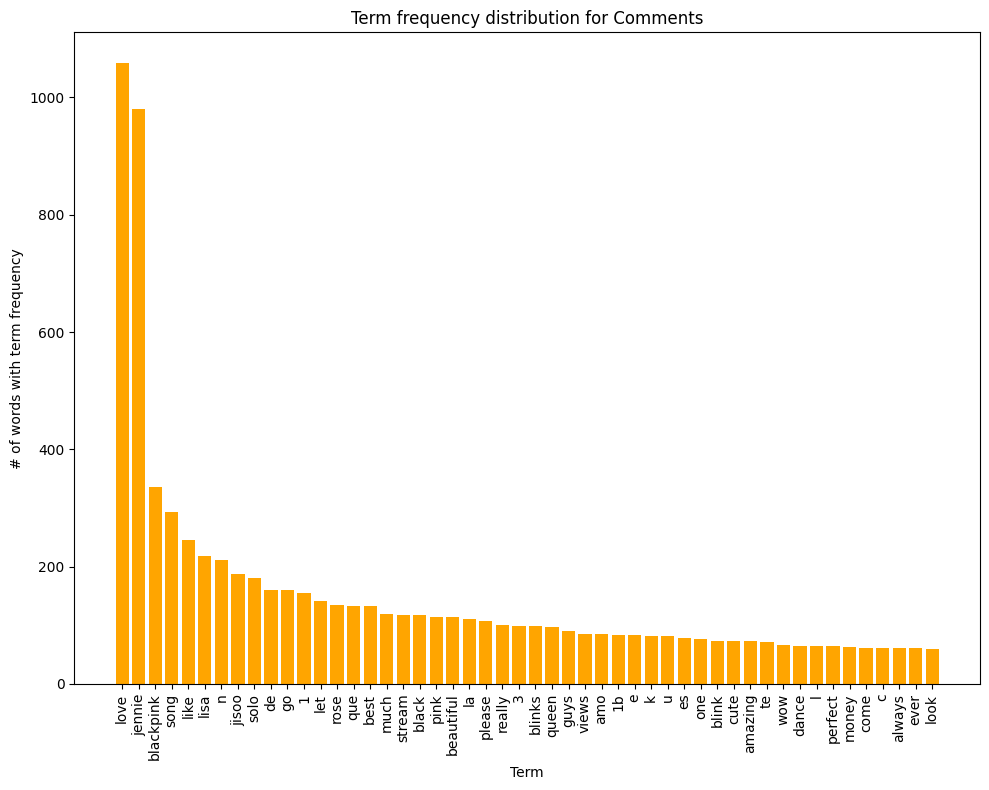

In [13]:
from collections import Counter
import matplotlib.pyplot as mpl

# Initialize a term frequency counter
term_freq_counter = Counter()

# Extract and analyze comments
for comment_data in youtube_data_bp:  # Iterate over the list directly
    # Tokenize and create term frequency for comment_text
    comment_text = comment_data.get('comment_text', '')  # Check if 'comment_text' key exists
    comment_words = comment_text.split()
    term_freq_counter.update(comment_words)

# Number of most frequent terms to display
freq_num = 50

# Get the most common terms and their counts
common_terms = term_freq_counter.most_common(freq_num)
terms, counts = zip(*common_terms)

# Print out the most common terms
for term, count in common_terms:
    print(f"{term}: {count}")

# Construct the x and y values
y = [count for term, count in common_terms]
x = range(1, len(y) + 1)

# Plot the term frequency distribution
mpl.figure(figsize=(10, 8))
mpl.bar(x, y, color='orange')
mpl.title("Term frequency distribution for Comments")
mpl.ylabel('# of words with term frequency')
mpl.xlabel('Term')
mpl.xticks(x, terms, rotation='vertical')  # Print terms on the x-axis
mpl.tight_layout()
mpl.show()


love: 1058
jennie: 980
blackpink: 336
song: 293
like: 246
lisa: 218
jisoo: 188
solo: 180
let: 142
rose: 135
que: 133
best: 133
much: 119
stream: 117
black: 117
pink: 115
beautiful: 114
please: 108
really: 101
blinks: 98
queen: 97
guys: 90
views: 86
amo: 85
one: 77
blink: 74
cute: 74
amazing: 73
wow: 66
dance: 65
perfect: 64
money: 63
come: 62
always: 61
ever: 61
look: 60


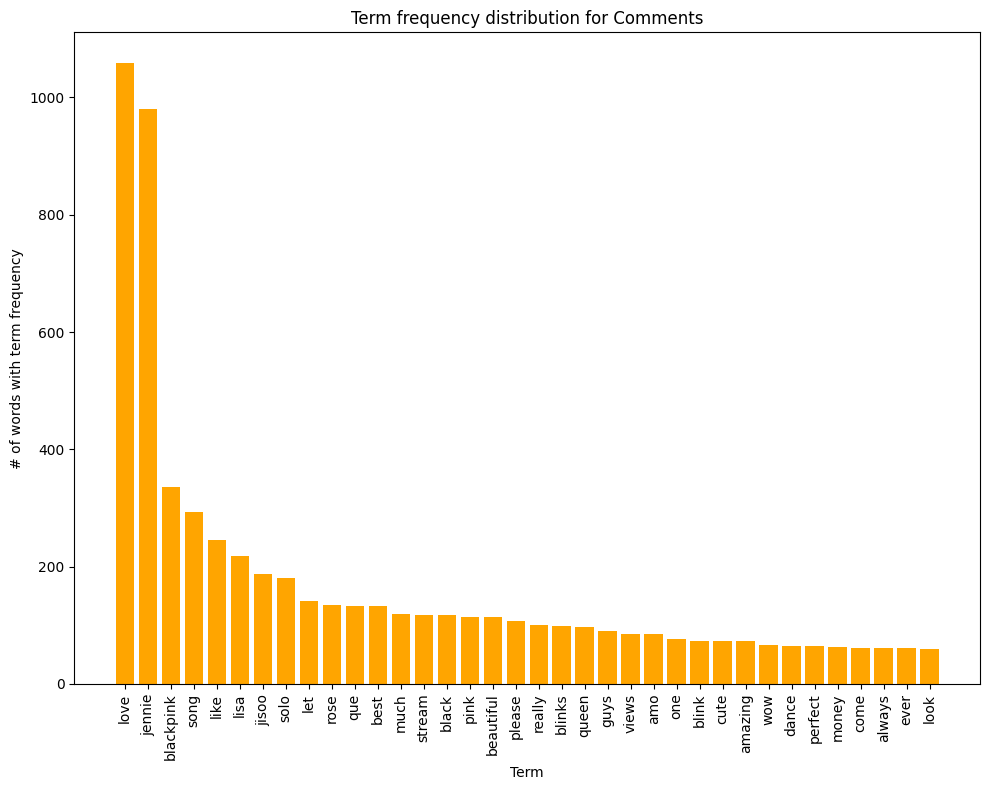

In [14]:
from collections import Counter
import matplotlib.pyplot as plt

# Initialize a term frequency counter
term_freq_counter = Counter()

# Extract and analyze comments
for comment_data in youtube_data_bp:
    # Tokenize and create term frequency for comment_text
    comment_text = comment_data.get('comment_text', '')  # Check if 'comment_text' key exists
    comment_words = comment_text.split()
    term_freq_counter.update(comment_words)

# Number of most frequent terms to display
freq_num = 50

# Get the most common terms and their counts
common_terms = term_freq_counter.most_common(freq_num)

# Filter out terms with length 2 or fewer characters
common_terms = [(term, count) for term, count in common_terms if len(term) > 2]

# Check if common_terms is empty
if not common_terms:
    print("No common terms found.")
else:
    terms, counts = zip(*common_terms)

    # Print out the most common terms
    for term, count in common_terms:
        print(f"{term}: {count}")

    # Construct the x and y values
    y = [count for term, count in common_terms]
    x = range(1, len(y) + 1)

    # Plot the term frequency distribution
    plt.figure(figsize=(10, 8))
    plt.bar(x, y, color='orange')
    plt.title("Term frequency distribution for Comments")
    plt.ylabel('# of words with term frequency')
    plt.xlabel('Term')
    plt.xticks(x, terms, rotation='vertical')  # Print terms on the x-axis
    plt.tight_layout()
    plt.show()


In [15]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to lemmatize the text using WordNetLemmatizer
def lemmatize_text(text):
    token_words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in token_words]
    return " ".join(lemmatized_words)

# Lemmatize comments in youtube_data_bp
for comment_data in youtube_data_bp:
    comment_text = comment_data.get('comment_text', '')  # Get the comment text
    lemmatized_comment_text = lemmatize_text(comment_text)
    comment_data['comment_text'] = lemmatized_comment_text

# Now your YouTube comment data in youtube_data_bp has the comment_text lemmatized.


[nltk_data] Downloading package punkt to /Users/lee-jun-
[nltk_data]     won/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/lee-jun-
[nltk_data]     won/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
youtube_data_bp

[{'commenter_id': 'UCgu_CgikmyhrYBmQzH535eg',
  'commenter_name': 'СУПЕР ГУСЬ',
  'comment_text': 'jisoo',
  'comment_timestamp': '2023-10-10T06:41:57Z',
  'comment_likes': 0,
  'video_id': 'VlUv1lED0rE',
  'video_title': 'BLACKPINK WORLD TOUR [BORN PINK] OSAKA HIGHLIGHT CLIP',
  'video_timestamp': '2023-06-08T12:00:21Z',
  'video_views': '1258360',
  'video_likes': '181722',
  'replies': []},
 {'commenter_id': 'UCAUiU-DuAj1BpQ_jpXpPvJg',
  'commenter_name': 'Ready for love',
  'comment_text': '2 03',
  'comment_timestamp': '2023-10-10T06:40:40Z',
  'comment_likes': 0,
  'video_id': 'eQNHDV7lKgE',
  'video_title': 'JENNIE - ‘You & Me’ DANCE PERFORMANCE VIDEO',
  'video_timestamp': '2023-10-06T04:00:20Z',
  'video_views': '21244288',
  'video_likes': '2184932',
  'replies': []},
 {'commenter_id': 'UCaMIIV47FtbseiVaAtYEdBQ',
  'commenter_name': 'Black',
  'comment_text': '',
  'comment_timestamp': '2023-10-17T21:21:51Z',
  'comment_likes': 0,
  'video_id': 'dNCWe_6HAM8',
  'video_title':

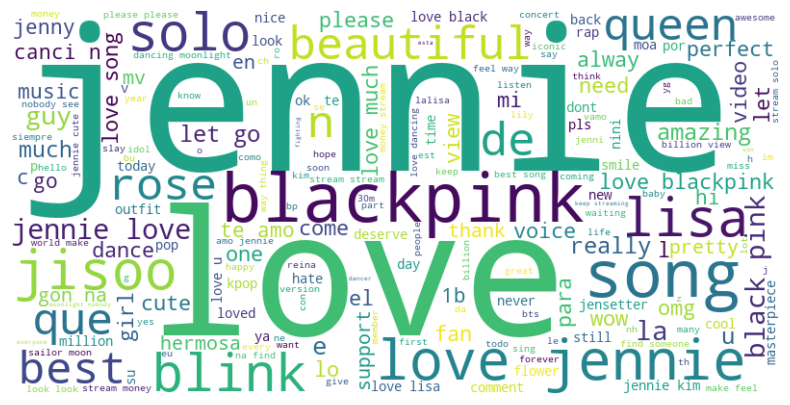

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract and combine comments into a single text
combined_text = []

for comment_data in youtube_data_bp:
    comment_text = comment_data.get('comment_text', '')  # Get the comment text
    combined_text.append(comment_text)

# Join the text data into a single string
text_data = ' '.join(combined_text)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the generated word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


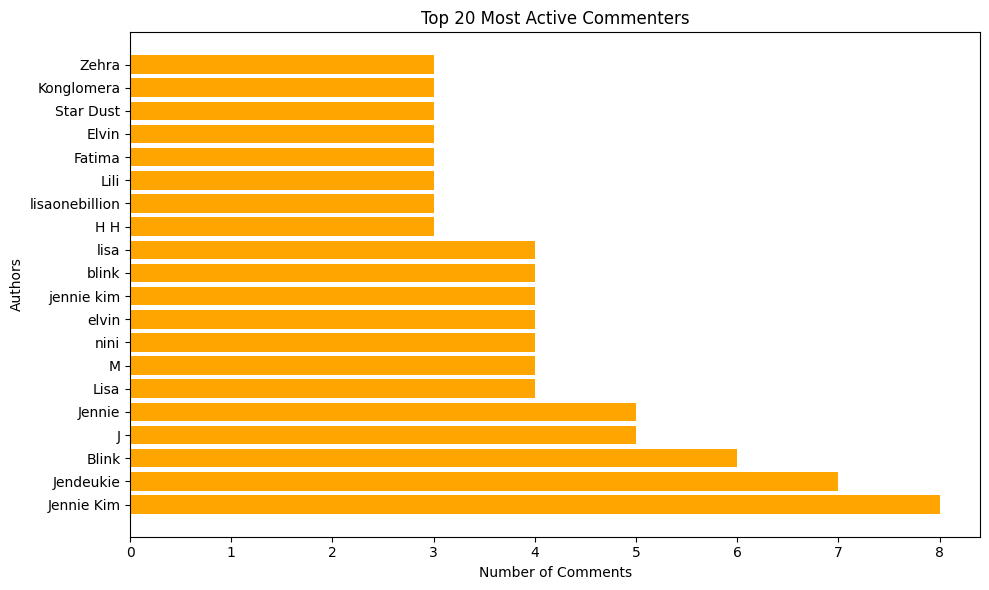

In [18]:
import matplotlib.pyplot as plt
from collections import Counter

# Extract comment data from youtube_data_bp
comments = [comment_data.get('comment_text', '') for comment_data in youtube_data_bp]

# Replace "Unknown" with "N/A" for comment authors without a specified name
comment_authors = [comment_data.get('commenter_name', 'N/A') for comment_data in youtube_data_bp]
author_comment_count = Counter(comment_authors)

# Get the top 20 authors with the most comments
top_authors = author_comment_count.most_common(20)

# Extract authors and their comment counts
authors, comment_counts = zip(*top_authors)
bar_color = 'orange'
# Plot the author comment distribution
plt.figure(figsize=(10, 6))
plt.barh(authors, comment_counts, color=bar_color)
plt.xlabel('Number of Comments')
plt.ylabel('Authors')
plt.title('Top 20 Most Active Commenters')
plt.tight_layout()
plt.show()


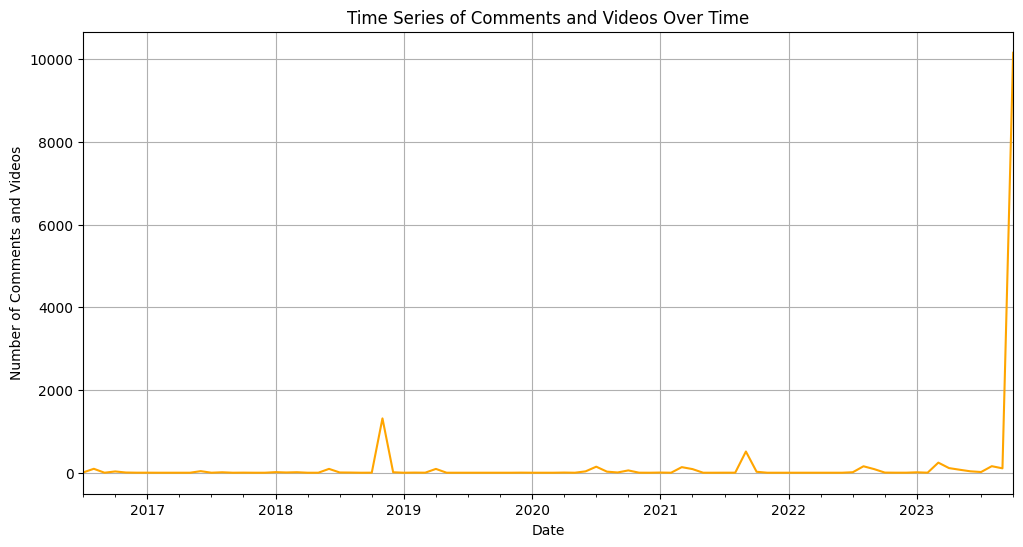

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract comment data from youtube_data_bp
comments = youtube_data_bp

# Create a list of timestamps for both comments and video timestamps
timestamps = [comment['comment_timestamp'] for comment in comments]
timestamps += [comment['video_timestamp'] for comment in comments]

# Convert timestamps to datetime objects
timestamps = [pd.to_datetime(timestamp) for timestamp in timestamps]

# Create a DataFrame with timestamps
df = pd.DataFrame({'Timestamp': timestamps})

# Group the data by month and count the number of comments and videos in each month
monthly_counts = df.resample('M', on='Timestamp').size()

# Plot the time series graph
plt.figure(figsize=(12, 6))
monthly_counts.plot(color='orange')
plt.xlabel('Date')
plt.ylabel('Number of Comments and Videos')
plt.title('Time Series of Comments and Videos Over Time')
plt.grid()
plt.show()


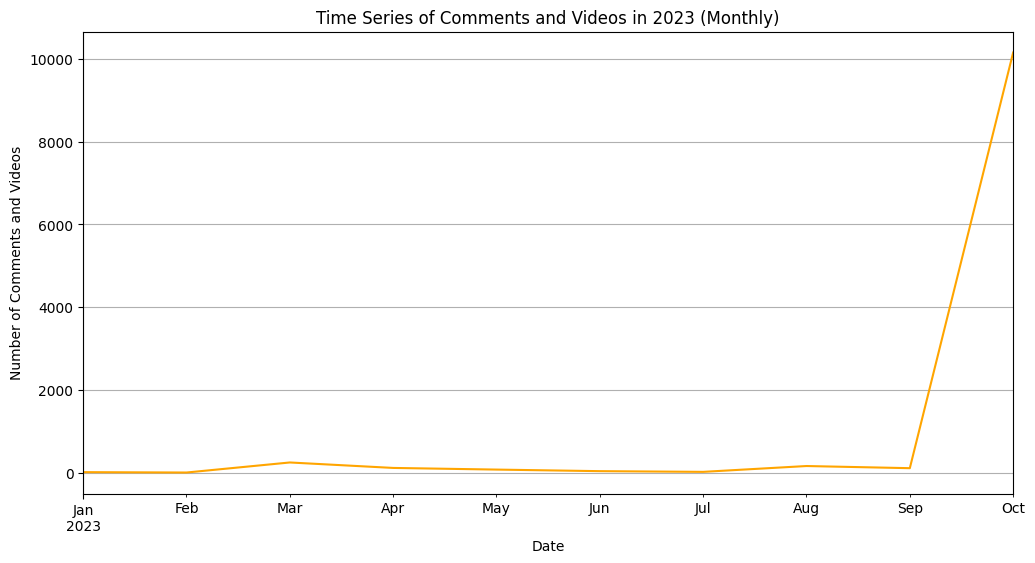

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract comment data from youtube_data_bp
comments = youtube_data_bp

# Create a list of timestamps for both comments and video timestamps
timestamps = [comment['comment_timestamp'] for comment in comments]
timestamps += [comment['video_timestamp'] for comment in comments]

# Convert timestamps to datetime objects and set them to the UTC time zone
timestamps = [pd.to_datetime(timestamp, format='%Y-%m-%dT%H:%M:%SZ').tz_localize('UTC') for timestamp in timestamps]

# Filter the timestamps for the year 2023
start_date = pd.to_datetime('2023-01-01').tz_localize('UTC')
end_date = pd.to_datetime('2023-12-31').tz_localize('UTC')  # End of the year
timestamps = [timestamp for timestamp in timestamps if start_date <= timestamp <= end_date]

# Create a DataFrame with timestamps
df = pd.DataFrame({'Timestamp': timestamps})

# Group the data by month and count the number of comments and videos in each month
monthly_counts = df.resample('M', on='Timestamp').size()

# Plot the time series graph
plt.figure(figsize=(12, 6))
monthly_counts.plot(color='orange')
plt.xlabel('Date')
plt.ylabel('Number of Comments and Videos')
plt.title('Time Series of Comments and Videos in 2023 (Monthly)')
plt.grid()
plt.show()


The video with the most comments is video ID eQNHDV7lKgE with 1833 comments.


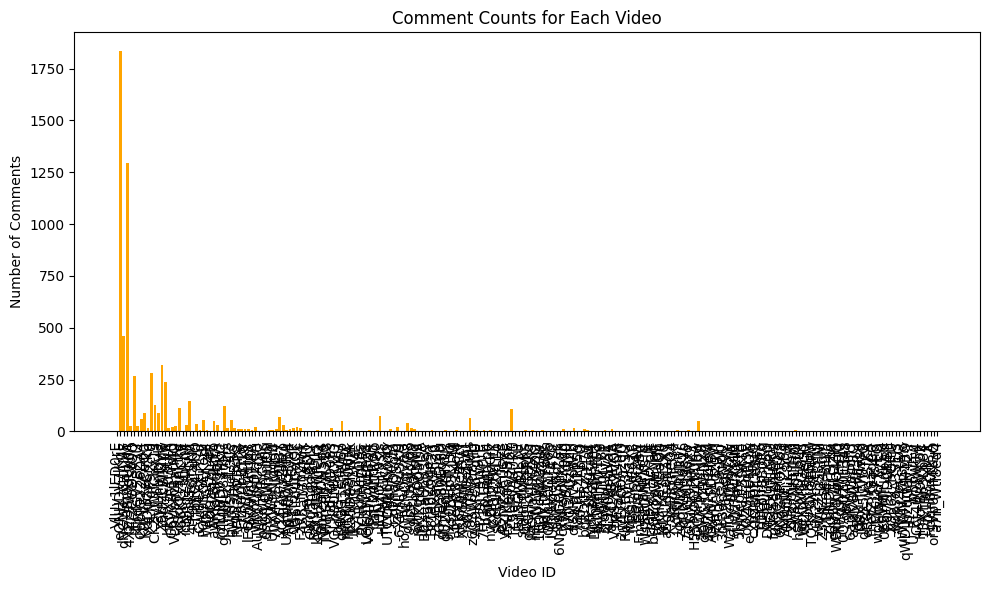

In [21]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Extract comment data from youtube_data_bp
comments = youtube_data_bp

# Create a dictionary to store the comment count for each video
video_comment_counts = defaultdict(int)

# Count comments for each video
for comment in comments:
    video_id = comment['video_id']
    video_comment_counts[video_id] += 1

# Find the video with the most comments
most_commented_video = max(video_comment_counts, key=video_comment_counts.get)
comment_count = video_comment_counts[most_commented_video]

print(f"The video with the most comments is video ID {most_commented_video} with {comment_count} comments.")

# Plot a bar chart to visualize comment counts for each video
video_ids, counts = zip(*video_comment_counts.items())
plt.figure(figsize=(10, 6))
plt.bar(video_ids, counts, color = 'orange')
plt.xlabel('Video ID')
plt.ylabel('Number of Comments')
plt.title('Comment Counts for Each Video')
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()


In [22]:
from collections import Counter

# Extract comment data from youtube_data_bp
comments = youtube_data_bp

# Create a Counter to count the number of comments for each video
video_comment_counts = Counter(comment['video_id'] for comment in comments)

# Count the number of unique videos
unique_videos = len(video_comment_counts)

print(f'The number of unique videos is: {unique_videos}')


The number of unique videos is: 238


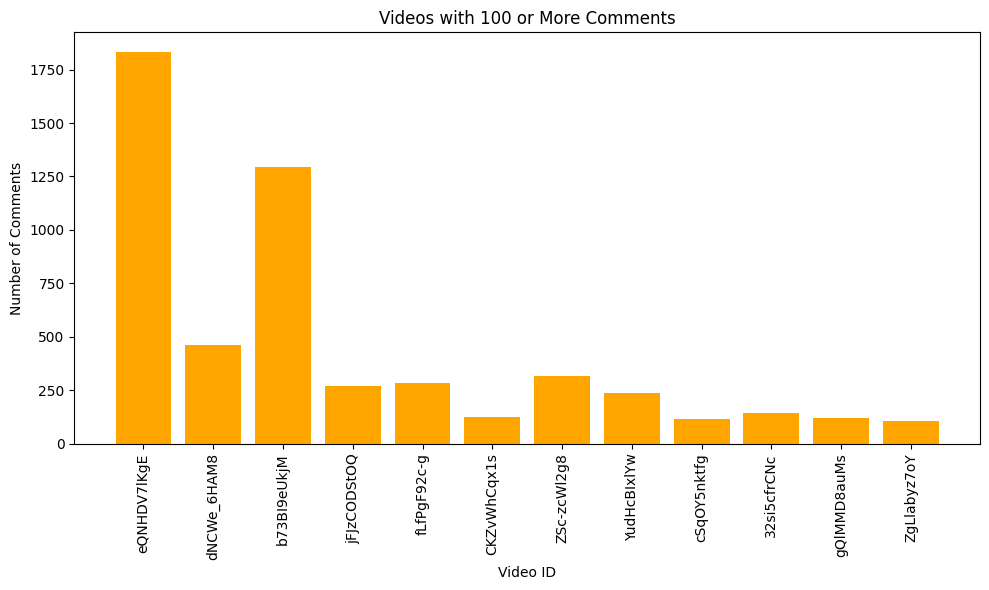

In [23]:
import matplotlib.pyplot as plt
from collections import Counter

# Extract comment data from youtube_data_bp
comments = youtube_data_bp

# Create a Counter to count the number of comments for each video
video_comment_counts = Counter(comment['video_id'] for comment in comments)

# Filter videos with 100 or more comments
videos_with_100_or_more_comments = {video: count for video, count in video_comment_counts.items() if count >= 100}

# Plot a bar chart to visualize videos with 100 or more comments
video_ids, counts = zip(*videos_with_100_or_more_comments.items())
plt.figure(figsize=(10, 6))
plt.bar(video_ids, counts, color='orange')
plt.xlabel('Video ID')
plt.ylabel('Number of Comments')
plt.title('Videos with 100 or More Comments')
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()


## Need to add TS

# Sentiment Analysis

In [24]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Create a VADER SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each comment in your YouTube data
for comment in youtube_data_bp:
    text = comment.get('comment_text', '')  # Assuming 'comment_text' is the key for comment text
    pol_score = sia.polarity_scores(text)
    comment['sentiment'] = pol_score

# Now, each comment in the data has a 'sentiment' field with the sentiment scores


In [25]:
youtube_data_bp

[{'commenter_id': 'UCgu_CgikmyhrYBmQzH535eg',
  'commenter_name': 'СУПЕР ГУСЬ',
  'comment_text': 'jisoo',
  'comment_timestamp': '2023-10-10T06:41:57Z',
  'comment_likes': 0,
  'video_id': 'VlUv1lED0rE',
  'video_title': 'BLACKPINK WORLD TOUR [BORN PINK] OSAKA HIGHLIGHT CLIP',
  'video_timestamp': '2023-06-08T12:00:21Z',
  'video_views': '1258360',
  'video_likes': '181722',
  'replies': [],
  'sentiment': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}},
 {'commenter_id': 'UCAUiU-DuAj1BpQ_jpXpPvJg',
  'commenter_name': 'Ready for love',
  'comment_text': '2 03',
  'comment_timestamp': '2023-10-10T06:40:40Z',
  'comment_likes': 0,
  'video_id': 'eQNHDV7lKgE',
  'video_title': 'JENNIE - ‘You & Me’ DANCE PERFORMANCE VIDEO',
  'video_timestamp': '2023-10-06T04:00:20Z',
  'video_views': '21244288',
  'video_likes': '2184932',
  'replies': [],
  'sentiment': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}},
 {'commenter_id': 'UCaMIIV47FtbseiVaAtYEdBQ',
  'commenter_name': 'Blac

In [26]:
for comment in youtube_data_bp:
    sentiment = comment.get('sentiment', {})
    compound_score = sentiment.get('compound', 0.0)

    if compound_score >= 0.2:
        comment['label'] = 1  # Positive sentiment
    elif compound_score < -0.2:
        comment['label'] = -1  # Negative sentiment
    else:
        comment['label'] = 0  # Neutral sentiment

    # Remove the 'sentiment' dictionary
    if 'sentiment' in comment:
        del comment['sentiment']


In [27]:
youtube_data_bp

[{'commenter_id': 'UCgu_CgikmyhrYBmQzH535eg',
  'commenter_name': 'СУПЕР ГУСЬ',
  'comment_text': 'jisoo',
  'comment_timestamp': '2023-10-10T06:41:57Z',
  'comment_likes': 0,
  'video_id': 'VlUv1lED0rE',
  'video_title': 'BLACKPINK WORLD TOUR [BORN PINK] OSAKA HIGHLIGHT CLIP',
  'video_timestamp': '2023-06-08T12:00:21Z',
  'video_views': '1258360',
  'video_likes': '181722',
  'replies': [],
  'label': 0},
 {'commenter_id': 'UCAUiU-DuAj1BpQ_jpXpPvJg',
  'commenter_name': 'Ready for love',
  'comment_text': '2 03',
  'comment_timestamp': '2023-10-10T06:40:40Z',
  'comment_likes': 0,
  'video_id': 'eQNHDV7lKgE',
  'video_title': 'JENNIE - ‘You & Me’ DANCE PERFORMANCE VIDEO',
  'video_timestamp': '2023-10-06T04:00:20Z',
  'video_views': '21244288',
  'video_likes': '2184932',
  'replies': [],
  'label': 0},
 {'commenter_id': 'UCaMIIV47FtbseiVaAtYEdBQ',
  'commenter_name': 'Black',
  'comment_text': '',
  'comment_timestamp': '2023-10-17T21:21:51Z',
  'comment_likes': 0,
  'video_id': 'dN

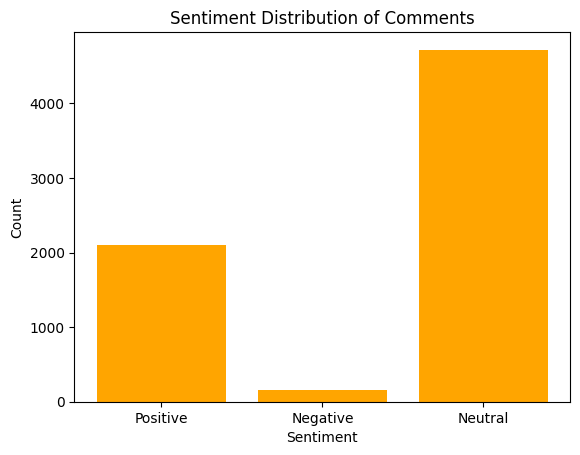

In [28]:
import matplotlib.pyplot as plt

# Initialize counters for positive, negative, and neutral comments
positive_count = 0
negative_count = 0
neutral_count = 0

for comment in youtube_data_bp:
    label = comment.get('label', 0)  # Default to 0 (neutral) if 'label' is not present
    if label == 1:
        positive_count += 1
    elif label == -1:
        negative_count += 1
    else:
        neutral_count += 1

# Create a bar graph
labels = ['Positive', 'Negative', 'Neutral']
counts = [positive_count, negative_count, neutral_count]

plt.bar(labels, counts, color='orange')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution of Comments')
plt.show()


In [29]:
from gensim.models import Word2Vec

# Extract and preprocess text from youtube_data_bp comments (assuming youtube_data_bp is a list)
comments = [comment.get('comment_text', '') for comment in youtube_data_bp]

# Tokenize the comments (you can use your preferred method for tokenization)
sentences = [comment.split() for comment in comments]

# Initialize the Word2Vec model
w2v_model = Word2Vec(sentences, min_count=200, window=5, vector_size=100, workers=4)

# Train the Word2Vec model
w2v_model.train(sentences, total_examples=len(sentences), epochs=10)

# Explore the model (example: most similar words)
similar_words_love = w2v_model.wv.most_similar(positive=['love'])
print(f"Words similar to 'love': {similar_words_love}")


Words similar to 'love': [('like', 0.9503809809684753), ('n', 0.9360811710357666), ('blackpink', 0.9278691411018372), ('song', 0.9145705699920654), ('jennie', 0.8129110336303711), ('lisa', 0.7380766272544861)]


In [30]:
type('youtube_data_bp')

str

In [31]:
# Function to calculate sentiment polarity
from textblob import TextBlob

def analyze_sentiment(text):
    sentiment = TextBlob(text).sentiment.polarity
    return sentiment

# Create a list of sentiment polarities for all YouTube comments
sentiment_polarities = []
for comment in youtube_data_bp:
    sentiment_polarity = analyze_sentiment(comment['comment_text'])  # You may need to adapt the comment data structure.
    sentiment_polarities.append(sentiment_polarity)

# Create a histogram of sentiment polarities using Plotly
import plotly.express as px

fig = px.histogram(sentiment_polarities, x=sentiment_polarities, title='Sentiment Polarity Distribution')
fig.show()


In [32]:
# Your list of keywords
keywords = ["blackpink", "song", "like", "love", "jisoo", "lisa", "rose", "jennie", "solo", "best","black"]

# Filter keywords that exist in the Word2Vec model's vocabulary
words = [word for word in keywords if word in w2v_model.wv.key_to_index]

# Extract vectors for selected keywords
X = np.array([w2v_model.wv[word] for word in words])

# Perform PCA with 2 components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
result = pca.fit_transform(X)

# Create a DataFrame to store results and information about keywords, distances, and components
import pandas as pd

df = pd.DataFrame(result, columns=["Component 1", "Component 2"])
df["Word"] = words
df["Distance"] = np.sqrt(df["Component 1"]**2 + df["Component 2"]**2)

# Create a scatter plot using Plotly Express
import plotly.express as px

fig = px.scatter(df, x="Component 1", y="Component 2", text="Word", color="Distance", color_continuous_scale="agsunset", size="Distance")
fig.update_traces(textposition='top center')
fig.layout.xaxis.autorange = True
fig.data[0].marker.line.width = 1
fig.data[0].marker.line.color = 'rgb(0, 0, 0)'
fig.update_layout(height=800, title_text="2D PCA of Word2Vec embeddings", template="plotly_white", paper_bgcolor="#f0f0f0")
fig.show()


# Youtube Taylor Swift

In [33]:
youtube_ts = 'youtube_data_ts.json' 

with open('youtube_data_ts.json', 'r', encoding='utf-8') as json_file:
    youtube_data_ts = json.load(json_file)

FileNotFoundError: [Errno 2] No such file or directory: 'youtube_data_ts.json'

In [ ]:
youtube_data_ts

{'UCSk2-r9LWR-zbTU5-jRr8AQ': {'commenter_id': 'UCSk2-r9LWR-zbTU5-jRr8AQ',
  'commenter_name': 'Sydney',
  'comment_text': 'help this came up in my recommended this vid is probably older than me😭',
  'comment_timestamp': '2023-10-10T01:57:50Z',
  'comment_likes': 0,
  'video_id': 'IgZY0frgysw',
  'video_title': 'Demonstrating my fine athletic skills. And more.',
  'video_timestamp': '2010-04-26T19:58:31Z',
  'video_views': '5368050',
  'video_likes': '152958',
  'replies': {}},
 'UC8sNljwao10XII4330J9lFg': {'commenter_id': 'UC8sNljwao10XII4330J9lFg',
  'commenter_name': '_Simply_Har_',
  'comment_text': 'Deff going.',
  'comment_timestamp': '2023-10-10T01:55:39Z',
  'comment_likes': 0,
  'video_id': 'KzNLM4nmRak',
  'video_title': 'The Eras Tour concert film is now officially coming to theaters WORLDWIDE on Oct 13! \U0001fa75',
  'video_timestamp': '2023-09-26T11:58:51Z',
  'video_views': '449695',
  'video_likes': '82126',
  'replies': {}},
 'UCB34e5U7d8b1A3N7ijWf9Qg': {'commenter_id':

In [ ]:
emoji_ranges = [
    (0x1F600, 0x1F64F),  # Emoticons
    (0x1F300, 0x1F5FF),  # Miscellaneous Symbols and Pictographs
    (0x1F680, 0x1F6FF),  # Transport and Map Symbols
    (0x1F700, 0x1F77F),  # Alchemical Symbols
    (0x1F780, 0x1F7FF),  # Geometric Shapes Extended
    (0x1F800, 0x1F8FF),  # Supplemental Arrows-C
    (0x1F900, 0x1F9FF),  # Supplemental Symbols and Pictographs
    (0x1FA00, 0x1FA6F),  # Chess Symbols
    (0x1FA70, 0x1FAFF),  # Symbols and Pictographs Extended-A
    (0x1F004, 0x1F0CF),  # CJK Compatibility Ideographs
]

# Create a regex pattern to match emojis in the specified Unicode ranges
emoji_pattern = '|'.join(f'[{chr(start)}-{chr(end)}]' for start, end in emoji_ranges)

def clean_comments(comments):
    cleaned_comments = []
    for comment_id, comment in comments.items():
        cleaned_comment = {
            "commenter_id": comment.get("commenter_id", ""),
            "commenter_name": clean_text(comment.get("commenter_name", "")),
            "comment_text": clean_text(comment.get("comment_text", "")),
            "comment_timestamp": comment.get("comment_timestamp", ""),
            "comment_likes": comment.get("comment_likes", 0),
            "video_id": comment.get("video_id", ""),
            "video_title": clean_text(comment.get("video_title", "")),
            "video_timestamp": comment.get("video_timestamp", ""),
            "video_views": comment.get("video_views", ""),
            "video_likes": comment.get("video_likes", ""),
            "replies": clean_comments(comment.get("replies", {}))  # Recursively clean replies
        }
        cleaned_comments.append(cleaned_comment)
    return cleaned_comments

# Clean the comments in the YouTube data
youtube_data_ts = clean_comments(youtube_data_ts)


In [ ]:
def remove_emojis(text):
    # Define a regex pattern to remove most emojis except the ones you want to keep
    emoji_pattern = r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U0001FB00-\U0001FBFF\U0001FC00-\U0001FCFF\U0001FD00-\U0001FDFF\U0001FE00-\U0001FEFF\U0001FF00-\U0001FFFF\U00002764\U00002728\U00002601\U0001F195\U00012620\U0001F61D]+'
    
    # Remove all emojis except the ones to keep
    text_no_emojis = re.sub(emoji_pattern, '', text)
    
    return text_no_emojis

In [ ]:
youtube_data_ts

[{'commenter_id': 'UCSk2-r9LWR-zbTU5-jRr8AQ',
  'commenter_name': 'sydney',
  'comment_text': 'help came recommended vid probably older',
  'comment_timestamp': '2023-10-10T01:57:50Z',
  'comment_likes': 0,
  'video_id': 'IgZY0frgysw',
  'video_title': 'demonstrating fine athletic skills',
  'video_timestamp': '2010-04-26T19:58:31Z',
  'video_views': '5368050',
  'video_likes': '152958',
  'replies': []},
 {'commenter_id': 'UC8sNljwao10XII4330J9lFg',
  'commenter_name': 'simply har',
  'comment_text': 'deff going',
  'comment_timestamp': '2023-10-10T01:55:39Z',
  'comment_likes': 0,
  'video_id': 'KzNLM4nmRak',
  'video_title': 'eras tour concert film officially coming theaters worldwide oct 13',
  'video_timestamp': '2023-09-26T11:58:51Z',
  'video_views': '449695',
  'video_likes': '82126',
  'replies': []},
 {'commenter_id': 'UCB34e5U7d8b1A3N7ijWf9Qg',
  'commenter_name': 'michelle cornejo',
  'comment_text': 'gonna amazing movie',
  'comment_timestamp': '2023-10-10T01:52:22Z',
  'c

In [ ]:
import json
import nltk
import string
from collections import Counter

# Download NLTK data (if not already downloaded)
nltk.download('stopwords')
nltk.download('punkt')

# Function to process text
def processText(text, tokenizer, stemmer, stopwords):
    # Tokenize the text using the given tokenizer
    tokens = tokenizer.tokenize(text)
    
    # Filter out stopwords and punctuation, and convert to lowercase
    filtered_tokens = [token.lower() for token in tokens if token.lower() not in stopwords]

    # Apply stemming to the filtered tokens
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    
    return stemmed_tokens

# Number of most frequent terms to display
freqNum = 50

# Tweet tokenizer to use
tweetTokenizer = nltk.tokenize.TweetTokenizer()
# Use the punctuation symbols defined in string.punctuation
punctuations = list(string.punctuation)
# Use stopwords from nltk and a few other terms
stopwords = nltk.corpus.stopwords.words('english') + punctuations + ['via'] + ['’']
# Use the popular Porter stemmer
stemmer = nltk.stem.PorterStemmer()
# Term frequency counter
termFreqCounter = Counter()

# Load data from a JSON file
json_file_path = 'youtube_data_ts.json'  # Replace with the path to your JSON file

with open(json_file_path, 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)

# Process comments from the loaded data
for item in data.values():
    commentText = item.get('comment_text', '')
    
    # Tokenize, filter stopwords, and convert to lowercase
    tokens = processText(text=commentText, tokenizer=tweetTokenizer, stemmer=stemmer, stopwords=stopwords)
    
    # Update count
    termFreqCounter.update(tokens)

# Print out most common terms
for term, count in termFreqCounter.most_common(freqNum):
    print(term + ': ' + str(count))


[nltk_data] Downloading package stopwords to /Users/lee-jun-
[nltk_data]     won/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/lee-jun-
[nltk_data]     won/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


❤: 3012
taylor: 1972
love: 1610
go: 757
️: 684
😭: 542
swift: 534
excit: 500
im: 457
omg: 438
song: 421
see: 414
🎉: 411
wait: 402
like: 401
much: 398
..: 339
swifti: 323
ticket: 317
come: 294
get: 292
one: 290
tour: 288
u: 287
year: 285
🩵: 283
concert: 276
fan: 273
😊: 268
i'm: 265
music: 261
era: 240
13: 236
know: 229
best: 225
movi: 223
😂: 215
...: 213
want: 197
day: 191
watch: 180
got: 180
make: 176
😍: 171
hi: 170
thank: 168
amaz: 167
💜: 166
can't: 166
1989: 164


In [ ]:
import re
import nltk
nltk.download('stopwords')


def clean_text(text_to_clean):
    text_to_clean = re.sub('[^a-zA-Z0-9@]', ' ', text_to_clean)  
    text_to_clean = re.sub('\s+', ' ', text_to_clean).strip() 
    words = text_to_clean.lower().split()  
    stops = set(nltk.corpus.stopwords.words('english'))  
    meaningful_words = [w for w in words if not w in stops]  
    return " ".join(meaningful_words)

# Assuming youtube_data_bp is a list of dictionaries with 'comment_text' key
# Modified code to correctly process each dictionary
for index, comment_data in enumerate(youtube_data_bp):
    if 'comment_text' in comment_data:
        comment_text = comment_data['comment_text']
        cleaned_comment_text = clean_text(comment_text)
        youtube_data_bp[index]['comment_text'] = cleaned_comment_text

print("Comment content has been cleaned and updated in the existing youtube_data_bp variable.")


[nltk_data] Downloading package stopwords to /Users/lee-jun-
[nltk_data]     won/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Comment content has been cleaned and updated in the existing youtube_data_bp variable.


In [ ]:
youtube_data_ts

[{'commenter_id': 'UCSk2-r9LWR-zbTU5-jRr8AQ',
  'commenter_name': 'sydney',
  'comment_text': 'help came recommended vid probably older',
  'comment_timestamp': '2023-10-10T01:57:50Z',
  'comment_likes': 0,
  'video_id': 'IgZY0frgysw',
  'video_title': 'demonstrating fine athletic skills',
  'video_timestamp': '2010-04-26T19:58:31Z',
  'video_views': '5368050',
  'video_likes': '152958',
  'replies': []},
 {'commenter_id': 'UC8sNljwao10XII4330J9lFg',
  'commenter_name': 'simply har',
  'comment_text': 'deff going',
  'comment_timestamp': '2023-10-10T01:55:39Z',
  'comment_likes': 0,
  'video_id': 'KzNLM4nmRak',
  'video_title': 'eras tour concert film officially coming theaters worldwide oct 13',
  'video_timestamp': '2023-09-26T11:58:51Z',
  'video_views': '449695',
  'video_likes': '82126',
  'replies': []},
 {'commenter_id': 'UCB34e5U7d8b1A3N7ijWf9Qg',
  'commenter_name': 'michelle cornejo',
  'comment_text': 'gonna amazing movie',
  'comment_timestamp': '2023-10-10T01:52:22Z',
  'c

taylor: 1978
love: 1541
swift: 525
excited: 491
im: 458
omg: 438
going: 418
much: 401
wait: 377
like: 369
see: 357
go: 339
u: 288
one: 286
tour: 283
tickets: 268
13: 259
music: 256
concert: 242
song: 241
get: 232
best: 225
years: 223
fan: 222
know: 216
movie: 207
eras: 207
songs: 180
got: 180
hi: 170
amazing: 166
1989: 165
please: 160
come: 158
tay: 155
swiftie: 152
want: 151
really: 150
ever: 148
day: 148
thank: 146
swifties: 142
could: 141
would: 130
wish: 125
cant: 124
happy: 124
version: 118
ur: 117
literally: 112


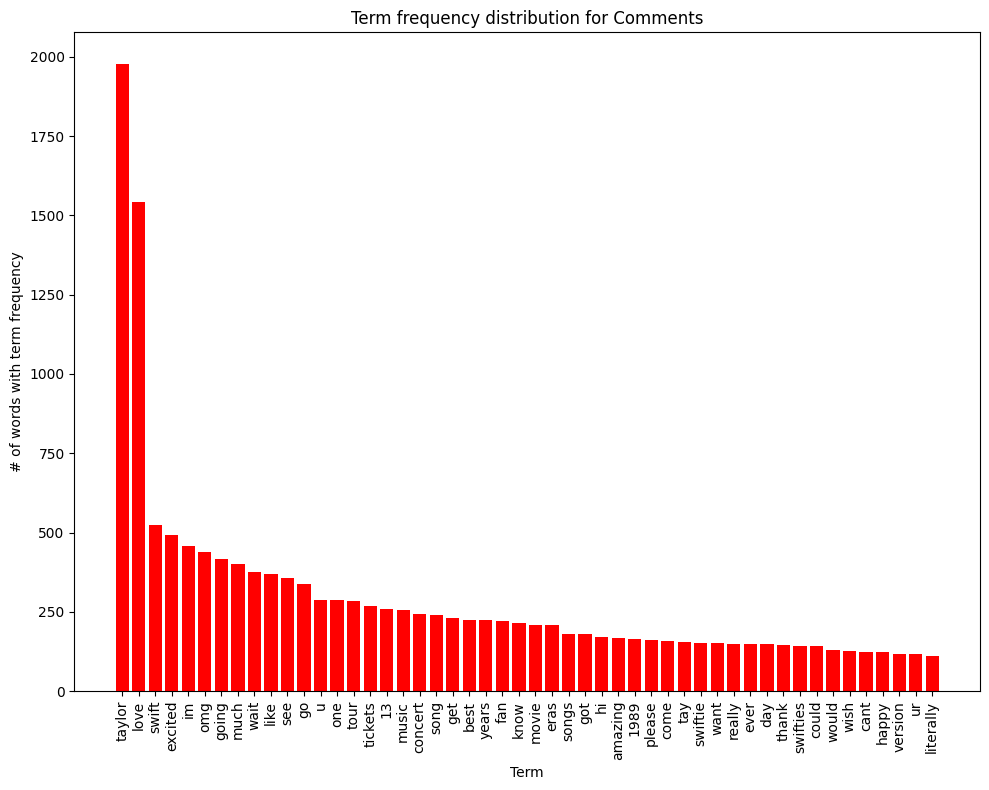

In [ ]:
from collections import Counter
import matplotlib.pyplot as mpl

# Initialize a term frequency counter
term_freq_counter = Counter()

# Extract and analyze comments
for comment_data in youtube_data_ts:  # Iterate over the list directly
    # Tokenize and create term frequency for comment_text
    comment_text = comment_data.get('comment_text', '')  # Check if 'comment_text' key exists
    comment_words = comment_text.split()
    term_freq_counter.update(comment_words)

# Number of most frequent terms to display
freq_num = 50

# Get the most common terms and their counts
common_terms = term_freq_counter.most_common(freq_num)
terms, counts = zip(*common_terms)

# Print out the most common terms
for term, count in common_terms:
    print(f"{term}: {count}")

# Construct the x and y values
y = [count for term, count in common_terms]
x = range(1, len(y) + 1)

# Plot the term frequency distribution
mpl.figure(figsize=(10, 8))
mpl.bar(x, y, color='red')
mpl.title("Term frequency distribution for Comments")
mpl.ylabel('# of words with term frequency')
mpl.xlabel('Term')
mpl.xticks(x, terms, rotation='vertical')  # Print terms on the x-axis
mpl.tight_layout()
mpl.show()


taylor: 1978
love: 1541
swift: 525
excited: 491
omg: 438
going: 418
much: 401
wait: 377
like: 369
see: 357
one: 286
tour: 283
tickets: 268
music: 256
concert: 242
song: 241
get: 232
best: 225
years: 223
fan: 222
know: 216
movie: 207
eras: 207
songs: 180
got: 180
amazing: 166
1989: 165
please: 160
come: 158
tay: 155
swiftie: 152
want: 151
really: 150
ever: 148
day: 148
thank: 146
swifties: 142
could: 141
would: 130
wish: 125
cant: 124
happy: 124
version: 118
literally: 112


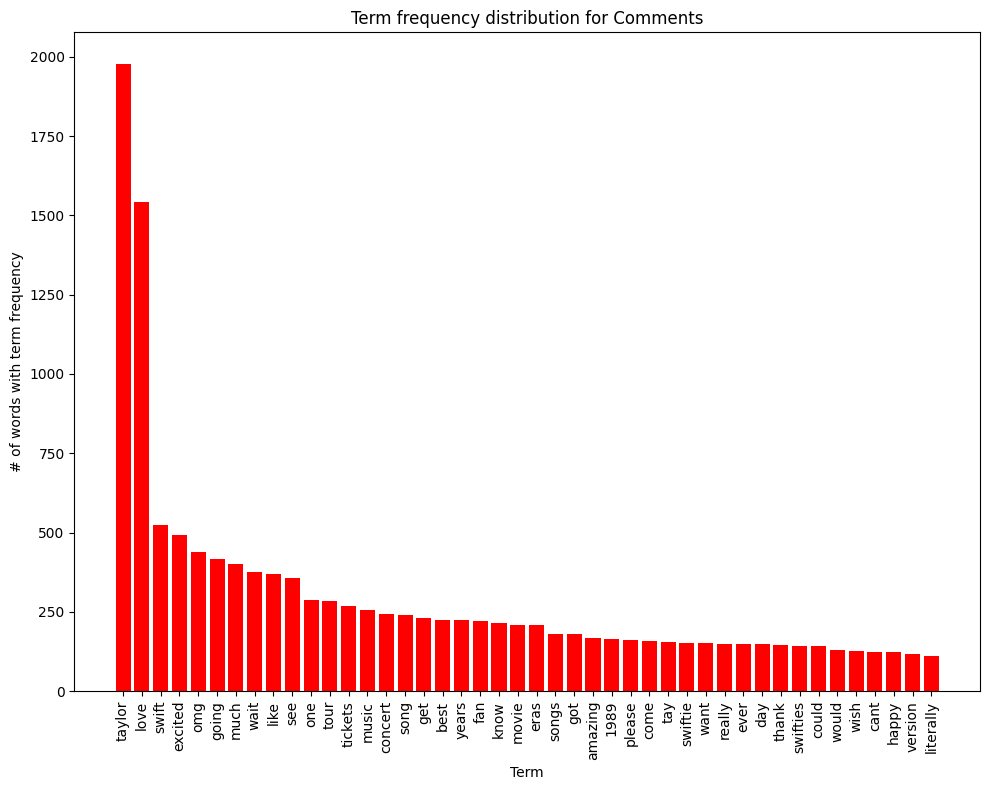

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Initialize a term frequency counter
term_freq_counter = Counter()

# Extract and analyze comments
for comment_data in youtube_data_ts:
    # Tokenize and create term frequency for comment_text
    comment_text = comment_data.get('comment_text', '')  # Check if 'comment_text' key exists
    comment_words = comment_text.split()
    term_freq_counter.update(comment_words)

# Number of most frequent terms to display
freq_num = 50

# Get the most common terms and their counts
common_terms = term_freq_counter.most_common(freq_num)

# Filter out terms with length 2 or fewer characters
common_terms = [(term, count) for term, count in common_terms if len(term) > 2]

# Check if common_terms is empty
if not common_terms:
    print("No common terms found.")
else:
    terms, counts = zip(*common_terms)

    # Print out the most common terms
    for term, count in common_terms:
        print(f"{term}: {count}")

    # Construct the x and y values
    y = [count for term, count in common_terms]
    x = range(1, len(y) + 1)

    # Plot the term frequency distribution
    plt.figure(figsize=(10, 8))
    plt.bar(x, y, color='red')
    plt.title("Term frequency distribution for Comments")
    plt.ylabel('# of words with term frequency')
    plt.xlabel('Term')
    plt.xticks(x, terms, rotation='vertical')  # Print terms on the x-axis
    plt.tight_layout()
    plt.show()


In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to lemmatize the text using WordNetLemmatizer
def lemmatize_text(text):
    token_words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in token_words]
    return " ".join(lemmatized_words)

# Lemmatize comments in youtube_data_bp
for comment_data in youtube_data_ts:
    comment_text = comment_data.get('comment_text', '')  # Get the comment text
    lemmatized_comment_text = lemmatize_text(comment_text)
    comment_data['comment_text'] = lemmatized_comment_text

# Now your YouTube comment data in youtube_data_bp has the comment_text lemmatized.


[nltk_data] Downloading package punkt to /Users/lee-jun-
[nltk_data]     won/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/lee-jun-
[nltk_data]     won/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
youtube_data_ts

[{'commenter_id': 'UCSk2-r9LWR-zbTU5-jRr8AQ',
  'commenter_name': 'sydney',
  'comment_text': 'help came recommended vid probably older',
  'comment_timestamp': '2023-10-10T01:57:50Z',
  'comment_likes': 0,
  'video_id': 'IgZY0frgysw',
  'video_title': 'demonstrating fine athletic skills',
  'video_timestamp': '2010-04-26T19:58:31Z',
  'video_views': '5368050',
  'video_likes': '152958',
  'replies': []},
 {'commenter_id': 'UC8sNljwao10XII4330J9lFg',
  'commenter_name': 'simply har',
  'comment_text': 'deff going',
  'comment_timestamp': '2023-10-10T01:55:39Z',
  'comment_likes': 0,
  'video_id': 'KzNLM4nmRak',
  'video_title': 'eras tour concert film officially coming theaters worldwide oct 13',
  'video_timestamp': '2023-09-26T11:58:51Z',
  'video_views': '449695',
  'video_likes': '82126',
  'replies': []},
 {'commenter_id': 'UCB34e5U7d8b1A3N7ijWf9Qg',
  'commenter_name': 'michelle cornejo',
  'comment_text': 'gon na amazing movie',
  'comment_timestamp': '2023-10-10T01:52:22Z',
  '

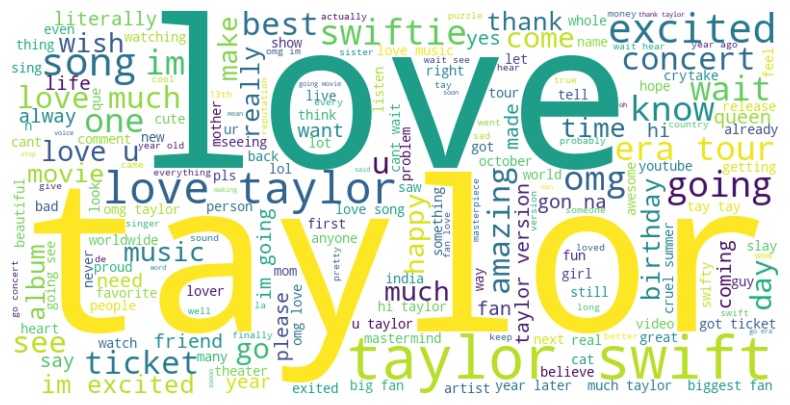

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract and combine comments into a single text
combined_text = []

for comment_data in youtube_data_ts:
    comment_text = comment_data.get('comment_text', '')  # Get the comment text
    combined_text.append(comment_text)

# Join the text data into a single string
text_data = ' '.join(combined_text)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the generated word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


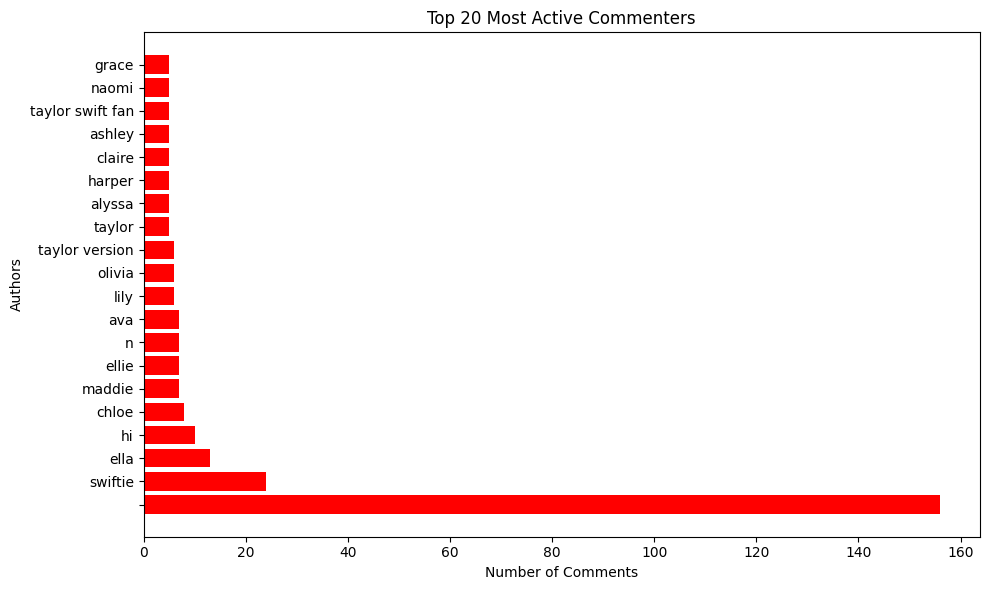

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Extract comment data from youtube_data_bp
comments = [comment_data.get('comment_text', '') for comment_data in youtube_data_ts]

# Replace "Unknown" with "N/A" for comment authors without a specified name
comment_authors = [comment_data.get('commenter_name', 'N/A') for comment_data in youtube_data_ts]
author_comment_count = Counter(comment_authors)

# Get the top 20 authors with the most comments
top_authors = author_comment_count.most_common(20)

# Extract authors and their comment counts
authors, comment_counts = zip(*top_authors)

# Plot the author comment distribution
plt.figure(figsize=(10, 6))
plt.barh(authors, comment_counts, color='red')
plt.xlabel('Number of Comments')
plt.ylabel('Authors')
plt.title('Top 20 Most Active Commenters')
plt.tight_layout()
plt.show()


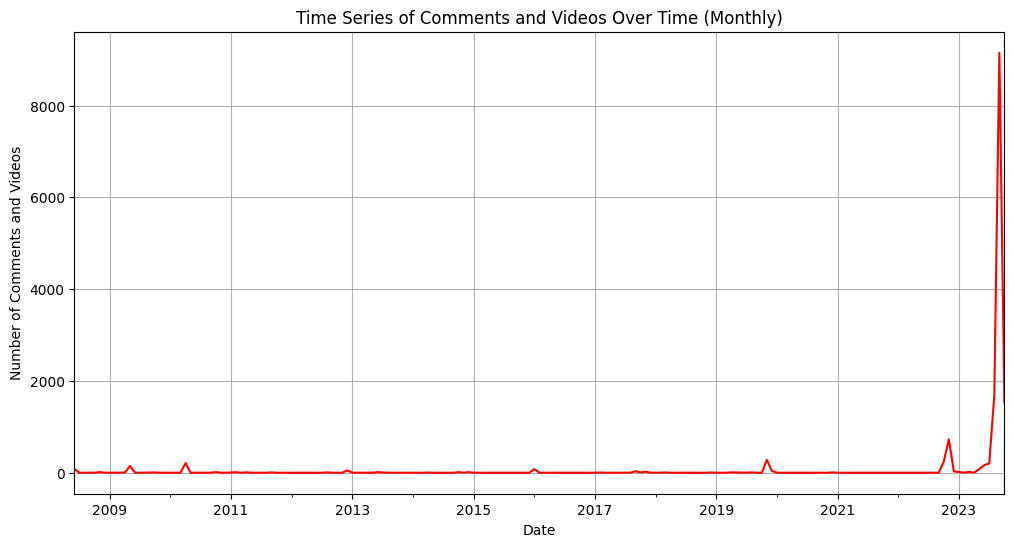

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract comment data from youtube_data_bp
comments = youtube_data_ts

# Create a list of timestamps for both comments and video timestamps
timestamps = [comment['comment_timestamp'] for comment in comments]
timestamps += [comment['video_timestamp'] for comment in comments]

# Convert timestamps to datetime objects
timestamps = [pd.to_datetime(timestamp) for timestamp in timestamps]

# Create a DataFrame with timestamps
df = pd.DataFrame({'Timestamp': timestamps})

# Group the data by month and count the number of comments and videos in each month
monthly_counts = df.resample('M', on='Timestamp').size()

# Plot the time series graph
plt.figure(figsize=(12, 6))
monthly_counts.plot(color='red')
plt.xlabel('Date')
plt.ylabel('Number of Comments and Videos')
plt.title('Time Series of Comments and Videos Over Time (Monthly)')
plt.grid()
plt.show()


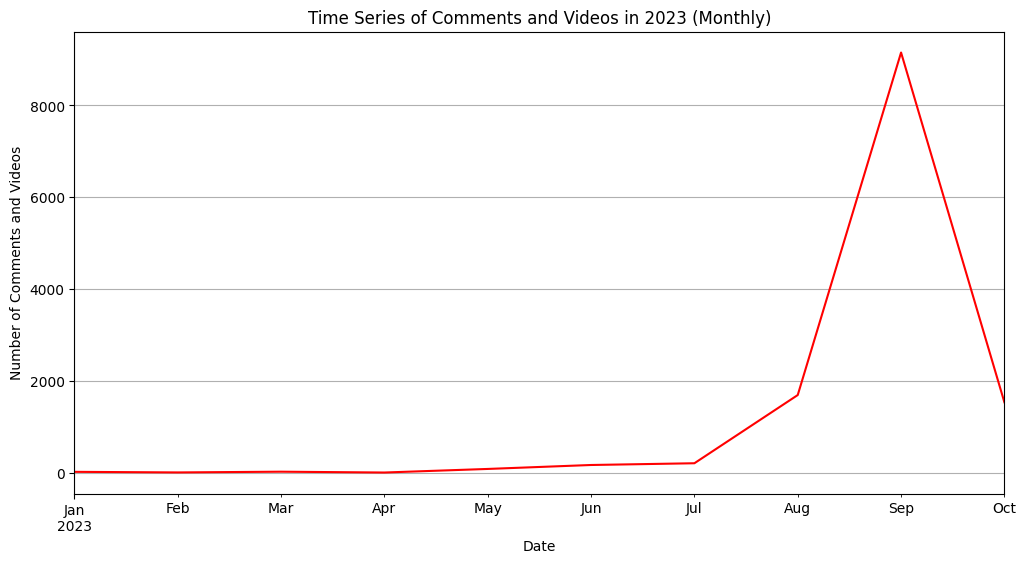

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract comment data from youtube_data_bp
comments = youtube_data_ts

# Create a list of timestamps for both comments and video timestamps
timestamps = [comment['comment_timestamp'] for comment in comments]
timestamps += [comment['video_timestamp'] for comment in comments]

# Convert timestamps to datetime objects and set them to the UTC time zone
timestamps = [pd.to_datetime(timestamp, format='%Y-%m-%dT%H:%M:%SZ').tz_localize('UTC') for timestamp in timestamps]

# Filter the timestamps for the year 2023
start_date = pd.to_datetime('2023-01-01').tz_localize('UTC')
end_date = pd.to_datetime('2023-12-31').tz_localize('UTC')  # End of the year
timestamps = [timestamp for timestamp in timestamps if start_date <= timestamp <= end_date]

# Create a DataFrame with timestamps
df = pd.DataFrame({'Timestamp': timestamps})

# Group the data by month and count the number of comments and videos in each month
monthly_counts = df.resample('M', on='Timestamp').size()

# Plot the time series graph
plt.figure(figsize=(12, 6))
monthly_counts.plot(color='red')
plt.xlabel('Date')
plt.ylabel('Number of Comments and Videos')
plt.title('Time Series of Comments and Videos in 2023 (Monthly)')
plt.grid()
plt.show()


The video with the most comments is video ID KzNLM4nmRak with 1627 comments.


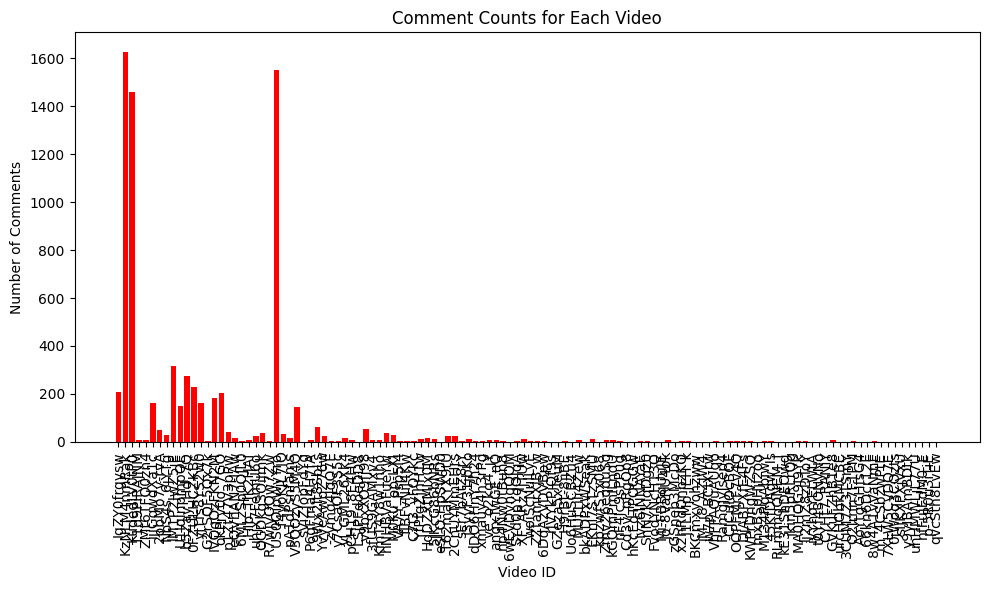

In [ ]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Extract comment data from youtube_data_bp
comments = youtube_data_ts

# Create a dictionary to store the comment count for each video
video_comment_counts = defaultdict(int)

# Count comments for each video
for comment in comments:
    video_id = comment['video_id']
    video_comment_counts[video_id] += 1

# Find the video with the most comments
most_commented_video = max(video_comment_counts, key=video_comment_counts.get)
comment_count = video_comment_counts[most_commented_video]

print(f"The video with the most comments is video ID {most_commented_video} with {comment_count} comments.")

# Plot a bar chart to visualize comment counts for each video
video_ids, counts = zip(*video_comment_counts.items())
plt.figure(figsize=(10, 6))
plt.bar(video_ids, counts, color='red')
plt.xlabel('Video ID')
plt.ylabel('Number of Comments')
plt.title('Comment Counts for Each Video')
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()


In [ ]:
from collections import Counter

# Extract comment data from youtube_data_bp
comments = youtube_data_ts

# Create a Counter to count the number of comments for each video
video_comment_counts = Counter(comment['video_id'] for comment in comments)

# Count the number of unique videos
unique_videos = len(video_comment_counts)

print(f'The number of unique videos is: {unique_videos}')


The number of unique videos is: 120


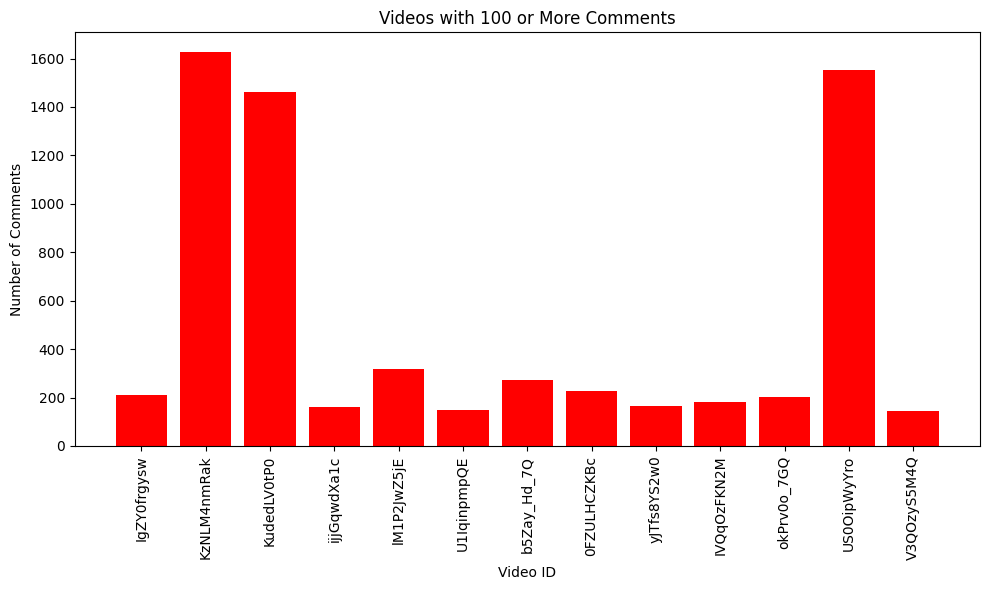

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Extract comment data from youtube_data_bp
comments = youtube_data_ts

# Create a Counter to count the number of comments for each video
video_comment_counts = Counter(comment['video_id'] for comment in comments)

# Filter videos with 100 or more comments
videos_with_100_or_more_comments = {video: count for video, count in video_comment_counts.items() if count >= 100}

# Plot a bar chart to visualize videos with 100 or more comments
video_ids, counts = zip(*videos_with_100_or_more_comments.items())
plt.figure(figsize=(10, 6))
plt.bar(video_ids, counts, color='red')
plt.xlabel('Video ID')
plt.ylabel('Number of Comments')
plt.title('Videos with 100 or More Comments')
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()


# Sentiment Analysis

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Create a VADER SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each comment in your YouTube data
for comment in youtube_data_ts:
    text = comment.get('comment_text', '')  # Assuming 'comment_text' is the key for comment text
    pol_score = sia.polarity_scores(text)
    comment['sentiment'] = pol_score

# Now, each comment in the data has a 'sentiment' field with the sentiment scores


In [ ]:
youtube_data_ts

[{'commenter_id': 'UCSk2-r9LWR-zbTU5-jRr8AQ',
  'commenter_name': 'sydney',
  'comment_text': 'help came recommended vid probably older',
  'comment_timestamp': '2023-10-10T01:57:50Z',
  'comment_likes': 0,
  'video_id': 'IgZY0frgysw',
  'video_title': 'demonstrating fine athletic skills',
  'video_timestamp': '2010-04-26T19:58:31Z',
  'video_views': '5368050',
  'video_likes': '152958',
  'replies': [],
  'sentiment': {'neg': 0.0, 'neu': 0.471, 'pos': 0.529, 'compound': 0.5423}},
 {'commenter_id': 'UC8sNljwao10XII4330J9lFg',
  'commenter_name': 'simply har',
  'comment_text': 'deff going',
  'comment_timestamp': '2023-10-10T01:55:39Z',
  'comment_likes': 0,
  'video_id': 'KzNLM4nmRak',
  'video_title': 'eras tour concert film officially coming theaters worldwide oct 13',
  'video_timestamp': '2023-09-26T11:58:51Z',
  'video_views': '449695',
  'video_likes': '82126',
  'replies': [],
  'sentiment': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}},
 {'commenter_id': 'UCB34e5U7d8b

In [ ]:
for comment in youtube_data_ts:
    sentiment = comment.get('sentiment', {})
    compound_score = sentiment.get('compound', 0.0)

    if compound_score >= 0.2:
        comment['label'] = 1  # Positive sentiment
    elif compound_score < -0.2:
        comment['label'] = -1  # Negative sentiment
    else:
        comment['label'] = 0  # Neutral sentiment

    # Remove the 'sentiment' dictionary
    if 'sentiment' in comment:
        del comment['sentiment']


In [ ]:
youtube_data_ts

[{'commenter_id': 'UCSk2-r9LWR-zbTU5-jRr8AQ',
  'commenter_name': 'sydney',
  'comment_text': 'help came recommended vid probably older',
  'comment_timestamp': '2023-10-10T01:57:50Z',
  'comment_likes': 0,
  'video_id': 'IgZY0frgysw',
  'video_title': 'demonstrating fine athletic skills',
  'video_timestamp': '2010-04-26T19:58:31Z',
  'video_views': '5368050',
  'video_likes': '152958',
  'replies': [],
  'label': 1},
 {'commenter_id': 'UC8sNljwao10XII4330J9lFg',
  'commenter_name': 'simply har',
  'comment_text': 'deff going',
  'comment_timestamp': '2023-10-10T01:55:39Z',
  'comment_likes': 0,
  'video_id': 'KzNLM4nmRak',
  'video_title': 'eras tour concert film officially coming theaters worldwide oct 13',
  'video_timestamp': '2023-09-26T11:58:51Z',
  'video_views': '449695',
  'video_likes': '82126',
  'replies': [],
  'label': 0},
 {'commenter_id': 'UCB34e5U7d8b1A3N7ijWf9Qg',
  'commenter_name': 'michelle cornejo',
  'comment_text': 'gon na amazing movie',
  'comment_timestamp':

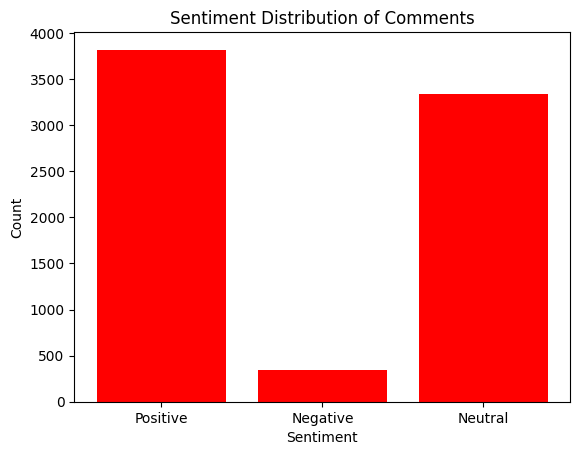

In [ ]:
import matplotlib.pyplot as plt

# Initialize counters for positive, negative, and neutral comments
positive_count = 0
negative_count = 0
neutral_count = 0

for comment in youtube_data_ts:
    label = comment.get('label', 0)  # Default to 0 (neutral) if 'label' is not present
    if label == 1:
        positive_count += 1
    elif label == -1:
        negative_count += 1
    else:
        neutral_count += 1

# Create a bar graph
labels = ['Positive', 'Negative', 'Neutral']
counts = [positive_count, negative_count, neutral_count]

plt.bar(labels, counts, color='red')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution of Comments')
plt.show()


In [ ]:
from gensim.models import Word2Vec

# Extract and preprocess text from youtube_data_bp comments (assuming youtube_data_bp is a list)
comments = [comment.get('comment_text', '') for comment in youtube_data_ts]

# Tokenize the comments (you can use your preferred method for tokenization)
sentences = [comment.split() for comment in comments]

# Initialize the Word2Vec model
w2v_model = Word2Vec(sentences, min_count=200, window=5, vector_size=100, workers=4)

# Train the Word2Vec model
w2v_model.train(sentences, total_examples=len(sentences), epochs=10)

# Explore the model (example: most similar words)
similar_words_love = w2v_model.wv.most_similar(positive=['love'])
print(f"Words similar to 'love': {similar_words_love}")


Words similar to 'love': [('swift', 0.9971539974212646), ('much', 0.9969125390052795), ('music', 0.9967125654220581), ('u', 0.9965311288833618), ('song', 0.9964509606361389), ('best', 0.996321976184845), ('fan', 0.9962818622589111), ('taylor', 0.9962053298950195), ('one', 0.9959233999252319), ('wait', 0.9959083199501038)]


In [ ]:
# Function to calculate sentiment polarity
from textblob import TextBlob

def analyze_sentiment(text):
    sentiment = TextBlob(text).sentiment.polarity
    return sentiment

# Create a list of sentiment polarities for all YouTube comments
sentiment_polarities = []
for comment in youtube_data_ts:
    sentiment_polarity = analyze_sentiment(comment['comment_text'])  # You may need to adapt the comment data structure.
    sentiment_polarities.append(sentiment_polarity)

# Create a histogram of sentiment polarities using Plotly
import plotly.express as px

fig = px.histogram(sentiment_polarities, x=sentiment_polarities, title='Sentiment Polarity Distribution')
fig.show()


In [ ]:
# Your list of keywords
keywords = ["love", "much", "know", "music", "swift", "song", "see", "best", "taylor", "swift","taylorswift"]

# Filter keywords that exist in the Word2Vec model's vocabulary
words = [word for word in keywords if word in w2v_model.wv.key_to_index]

# Extract vectors for selected keywords
X = np.array([w2v_model.wv[word] for word in words])

# Perform PCA with 2 components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
result = pca.fit_transform(X)

# Create a DataFrame to store results and information about keywords, distances, and components
import pandas as pd

df = pd.DataFrame(result, columns=["Component 1", "Component 2"])
df["Word"] = words
df["Distance"] = np.sqrt(df["Component 1"]**2 + df["Component 2"]**2)

# Create a scatter plot using Plotly Express
import plotly.express as px

fig = px.scatter(df, x="Component 1", y="Component 2", text="Word", color="Distance", color_continuous_scale="agsunset", size="Distance")
fig.update_traces(textposition='top center')
fig.layout.xaxis.autorange = True
fig.data[0].marker.line.width = 1
fig.data[0].marker.line.color = 'rgb(0, 0, 0)'
fig.update_layout(height=800, title_text="2D PCA of Word2Vec embeddings", template="plotly_white", paper_bgcolor="#f0f0f0")
fig.show()
